# 💻  **Step 1: Preparation**

## 🎥 **Loading the Movies dataset**

In [10]:
import pandas as pd

In [144]:
# Load the dataset from Github
url = 'https://raw.githubusercontent.com/siliataider/Neural-Network-Analysis-for-Predictive-Modeling/main/Top_rated_movies1.csv'
df1 = pd.read_csv(url)

## 📶 **Dataset characteristics**

In [12]:
df1.head(5)

,id,title,overview,popularity,release_date,vote_average,vote_count
0,168705,BloodRayne,"In 18th-century Romania, after spending much o...",17.499,2005-10-22,4.105,501
1,19766,Inspector Gadget 2,"After capturing Claw, all the criminals have g...",20.772,2003-03-11,4.100,342
2,248705,The Visitors: Bastille Day,"Stuck in the corridors of time, Godefroy de Mo...",18.828,2016-03-23,4.090,636
3,17711,The Adventures of Rocky & Bullwinkle,Rocky and Bullwinkle have been living off the ...,16.436,2000-06-30,4.075,335
4,580,Jaws: The Revenge,"After another deadly shark attack, Ellen Brody...",30.996,1987-07-17,4.064,931


In [13]:
df1.shape

(8831, 7)

In [14]:
df1.describe

<bound method NDFrame.describe of           id                                 title  \
0     168705                            BloodRayne   
1      19766                    Inspector Gadget 2   
2     248705            The Visitors: Bastille Day   
3      17711  The Adventures of Rocky & Bullwinkle   
4        580                     Jaws: The Revenge   
...      ...                                   ...   
8826   12142                     Alone in the Dark   
8827    5491                     Battlefield Earth   
8828   11059                     House of the Dead   
8829   14164                  Dragonball Evolution   
8830   40016            Birdemic: Shock and Terror   

                                               overview  popularity  \
0     In 18th-century Romania, after spending much o...      17.499   
1     After capturing Claw, all the criminals have g...      20.772   
2     Stuck in the corridors of time, Godefroy de Mo...      18.828   
3     Rocky and Bullwinkle have b

In [15]:
df1.isnull().sum()

id              0
title           0
overview        1
popularity      0
release_date    0
vote_average    0
vote_count      0
dtype: int64

In [16]:
df1 = df1.dropna()

In [17]:
df1.dtypes

id                int64
title            object
overview         object
popularity      float64
release_date     object
vote_average    float64
vote_count        int64
dtype: object

In [18]:
df1.corr()

<ipython-input-18-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,id,popularity,vote_average,vote_count
id,1.000000,0.161383,0.030725,-0.076822
popularity,0.161383,1.000000,0.141408,0.331585
vote_average,0.030725,0.141408,1.000000,0.278212
vote_count,-0.076822,0.331585,0.278212,1.000000


## ➿ **Data transformation**

In [19]:
df2 = df1.copy()

columns_to_drop = ['id']
df2 = df2.drop(columns=columns_to_drop)

In [20]:
df2['title_length'] = df1['title'].apply(len)

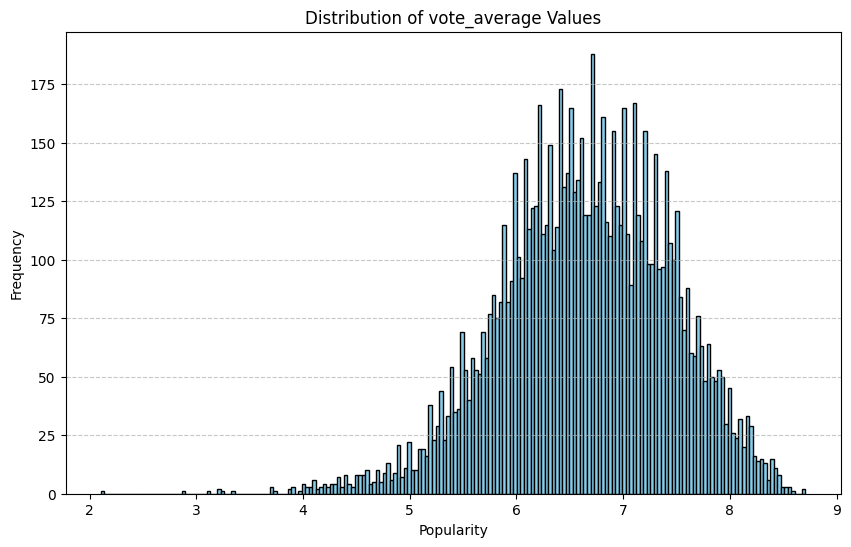

In [21]:
import matplotlib.pyplot as plt

popularity_values = df2['vote_average']

plt.figure(figsize=(10, 6))
plt.hist(popularity_values, bins=200, color='skyblue', edgecolor='black')
plt.title('Distribution of vote_average Values')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

conditions = [
    (df2['vote_average'] < 3),
    (df2['vote_average'] >= 3) & (df2['vote_average'] < 4.5),
    (df2['vote_average'] >= 4.5) & (df2['vote_average'] < 5.5),
    (df2['vote_average'] >= 5.5) & (df2['vote_average'] < 6.5),
    (df2['vote_average'] >= 6.5) & (df2['vote_average'] < 7.5),
    (df2['vote_average'] >= 7.5) & (df2['vote_average'] < 8),
    (df2['vote_average'] >= 8)
]

values = ['very bad', 'bad', 'mediocre', 'acceptable', 'good', 'very good', 'excellent']

df2['popularity_class'] = np.select(conditions, values)

label_encoder = LabelEncoder()
df2['popularity_class_labels'] = label_encoder.fit_transform(df2['popularity_class'])

df2['overview_len'] = df2['overview'].apply(len)

# Convert 'release_date' to the number of days since the minimum date
min_date = min(pd.to_datetime(df2['release_date']))
df2['release_date'] = (pd.to_datetime(df2['release_date']) - min_date).dt.days

In [23]:
df2.head()

,title,overview,popularity,release_date,vote_average,vote_count,title_length,popularity_class,popularity_class_labels,overview_len
0,BloodRayne,"In 18th-century Romania, after spending much o...",17.499,37809,4.105,501,10,bad,1,359
1,Inspector Gadget 2,"After capturing Claw, all the criminals have g...",20.772,36853,4.100,342,18,bad,1,348
2,The Visitors: Bastille Day,"Stuck in the corridors of time, Godefroy de Mo...",18.828,41614,4.090,636,26,bad,1,406
3,The Adventures of Rocky & Bullwinkle,Rocky and Bullwinkle have been living off the ...,16.436,35869,4.075,335,36,bad,1,337
4,Jaws: The Revenge,"After another deadly shark attack, Ellen Brody...",30.996,31137,4.064,931,17,bad,1,243


In [24]:
popularity_counts = df2['popularity_class'].value_counts()
popularity_counts

good          3857
acceptable    3056
very good      948
mediocre       583
excellent      304
bad             80
very bad         2
Name: popularity_class, dtype: int64

In [25]:
popularity_counts = df2['popularity_class_labels'].value_counts()
popularity_counts

3    3857
0    3056
6     948
4     583
2     304
1      80
5       2
Name: popularity_class_labels, dtype: int64

In [26]:
max_overview = df2['overview_len'].max()
min_overview = df2['overview_len'].min()

max_overview, min_overview

(998, 14)

In [27]:
max_title = df2['title_length'].max()
min_title = df2['title_length'].min()

max_title, min_title

(83, 1)

## 📈 **Dataset features**

In [28]:
# Targets
y_regression = df2['vote_average']
y_classification = df2['popularity_class_labels']

# Features
X_numeric_regression = df2[['release_date', 'title_length', 'overview_len', 'vote_count', 'popularity']]
X_numeric_regression.head(3)

,release_date,title_length,overview_len,vote_count,popularity
0,37809,10,359,501,17.499
1,36853,18,348,342,20.772
2,41614,26,406,636,18.828


In [29]:
X_numeric_classification = df2[['release_date', 'title_length', 'overview_len', 'vote_count', 'vote_average']]
X_numeric_classification.head(3)

,release_date,title_length,overview_len,vote_count,vote_average
0,37809,10,359,501,4.105
1,36853,18,348,342,4.100
2,41614,26,406,636,4.090


In [30]:
print(type(y_regression), type(X_numeric_regression))

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


##  	✏️ **Text vectorization**

### 📋 **Overview**

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tensorflow.keras.utils import to_categorical
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
vocabulary_size = 10000
max_len_overview = 500

def remove_stop_words(text):
    text = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word.isalpha() and not word in stop_words]
    return ' '.join(text)

df2['overview'] = df2['overview'].apply(remove_stop_words)

tokenizer = Tokenizer(num_words=vocabulary_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df2['overview'].astype(str))
X_text_seq = tokenizer.texts_to_sequences(df2['overview'].astype(str))
X_text_padded = pad_sequences(X_text_seq, maxlen=max_len_overview)

X_text_vectorized = X_text_padded
X_text_vectorized

array([[   0,    0,    0, ...,    1,  786,  720],
       [   0,    0,    0, ...,  984, 4051,  818],
       [   0,    0,    0, ...,    1, 2127,    1],
       ...,
       [   0,    0,    0, ...,  135,  579, 1079],
       [   0,    0,    0, ...,   44,   84,  803],
       [   0,    0,    0, ...,   23,  213,    1]], dtype=int32)

### 🔖 **Title**

In [33]:
max_len_title = 90

tokenizer = Tokenizer(num_words=vocabulary_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df2['title'].astype(str))
X_text_seq_title = tokenizer.texts_to_sequences(df2['title'].astype(str))
X_text_padded_title = pad_sequences(X_text_seq_title, maxlen=max_len_title)

X_text_vectorized_title = X_text_padded_title
X_text_vectorized_title

array([[   0,    0,    0, ...,    0,    0, 2688],
       [   0,    0,    0, ..., 1637, 1638,    7],
       [   0,    0,    0, ..., 1147, 1639,   25],
       ...,
       [   0,    0,    0, ...,    3,    2,   20],
       [   0,    0,    0, ...,    0, 6987, 1123],
       [   0,    0,    0, ..., 6989,    5, 1437]], dtype=int32)

## 🔢 **Numeric normalization**

In [34]:
X_numeric_classification.dtypes

release_date      int64
title_length      int64
overview_len      int64
vote_count        int64
vote_average    float64
dtype: object

In [35]:
X_numeric_regression.dtypes

release_date      int64
title_length      int64
overview_len      int64
vote_count        int64
popularity      float64
dtype: object

In [36]:
from sklearn.preprocessing import Normalizer

def normalize_numeric(X_numeric):
  normalizer = Normalizer()
  X_numeric_normalized = normalizer.fit_transform(X_numeric)
  return X_numeric_normalized

In [37]:
X_numeric_regression_normalized = normalize_numeric(X_numeric_regression)
X_numeric_regression_normalized

array([[9.99867014e-01, 2.64452118e-04, 9.49383105e-03, 1.32490511e-02,
        4.62764762e-04],
       [9.99912089e-01, 4.88384056e-04, 9.44209174e-03, 9.27929706e-03,
        5.63595200e-04],
       [9.99835360e-01, 6.24686869e-04, 9.75472572e-03, 1.52808019e-02,
        4.52369399e-04],
       ...,
       [9.99900814e-01, 4.60858742e-04, 1.01660017e-02, 9.73225226e-03,
        2.92645301e-04],
       [9.98731916e-01, 5.11566827e-04, 1.04359633e-02, 4.92383071e-02,
        9.88500580e-04],
       [9.99955490e-01, 6.59902603e-04, 5.30460169e-03, 7.76654602e-03,
        3.51601183e-04]])

In [38]:
X_numeric_classification_normalized = normalize_numeric(X_numeric_classification)
X_numeric_classification_normalized

array([[9.99867115e-01, 2.64452145e-04, 9.49383201e-03, 1.32490525e-02,
        1.08557606e-04],
       [9.99912241e-01, 4.88384130e-04, 9.44209318e-03, 9.27929847e-03,
        1.11243052e-04],
       [9.99835458e-01, 6.24686930e-04, 9.75472667e-03, 1.52808034e-02,
        9.82680594e-05],
       ...,
       [9.99900853e-01, 4.60858760e-04, 1.01660021e-02, 9.73225264e-03,
        8.40389504e-05],
       [9.98732402e-01, 5.11567076e-04, 1.04359683e-02, 4.92383310e-02,
        7.39470208e-05],
       [9.99955551e-01, 6.59902643e-04, 5.30460201e-03, 7.76654649e-03,
        5.34521141e-05]])

## 🔪 **Dataset split: test and train**

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# Split the data into train and test sets (70% train, 30% test)
def split_dataset(features, target):
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
  print("Training set shape:", X_train.shape, y_train.shape)
  print("Testing set shape:", X_test.shape, y_test.shape)
  return X_train, X_test, y_train, y_test

# 🐌 **Step 2: Model Training**

## 🍀 **Build the model**

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [57]:
def build_model1(dim):
  model1 = Sequential()
  model1.add(Dense(10, input_dim = dim, activation='relu'))
  model1.add(Dense(50, activation='relu'))
  model1.add(Dense(50, activation='relu'))
  model1.add(Dense(1))
  return model1

In [58]:
from tensorflow.keras.regularizers import l2

def build_model1_classification(dim):
    model1 = Sequential()
    model1.add(Flatten())
    model1.add(Dense(128, input_dim=dim, activation='relu', kernel_regularizer=l2(0.01)))
    model1.add(Dropout(0.4))
    model1.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model1.add(Dropout(0.4))
    model1.add(Dense(7, activation='softmax'))
    return model1

In [59]:
def build_model2(dim):
  model2 = Sequential()
  model2.add(Dense(10, input_dim = dim))
  model2.add(Dense(50, activation='relu'))
  model2.add(Dropout(0.2))
  model2.add(Dense(50, activation='relu'))
  model2.add(Dropout(0.2))
  model2.add(Dense(50, activation='relu'))
  model2.add(Dropout(0.2))
  model2.add(Dense(50, activation='relu'))
  model2.add(Dense(1))
  return model2

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, SpatialDropout1D
from tensorflow.keras.regularizers import l2

def build_model_embedding():
    model = Sequential([
        Embedding(input_dim=vocabulary_size, output_dim=64, input_length=max_len),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(7, activation='softmax')
    ])
    return model

In [61]:
def build_model_embedding_2():
    model = Sequential()
    model.add(Embedding(vocabulary_size, 128, input_length=max_len))
    model.add(Conv1D(32, 7, activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(Conv1D(32, 7, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(7, activation='softmax'))
    return model

In [62]:
def build_model_embedding_3():
    model = Sequential([
        Embedding(input_dim=vocabulary_size, output_dim=64, input_length=max_len),
        LSTM(64),
        Dense(7, activation='softmax')
    ])

In [63]:
def build_model_embedding_4():
    model = Sequential([
        Embedding(input_dim=vocabulary_size, output_dim=64, input_length=max_len),
        Flatten(),
        Dense(32, activation='relu'),
        Dropout(0.4),
        Dense(32, activation='relu'),
        Dropout(0.4),
        Dense(32, activation='relu'),
        Dense(7, activation='softmax')
    ])
    return model

In [64]:
def build_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=vocabulary_size, output_dim=128, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(7, activation='softmax'))
    return model

## 💭 **Make predictions**

### 🔧 **Utility functions**:

In [142]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

def predict_from_model_regression(model):
  y_pred = model.predict(X_test)
  r_squared = r2_score(y_test, y_pred)
  print("R-squared:", r_squared)
  explained_variance = explained_variance_score(y_test, y_pred)
  print("Explained Variance:", explained_variance)

In [157]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
import seaborn as sns


def predict_from_model_classification(model):
    y_pred_class = np.argmax(model.predict(X_test), axis=1)
    confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_pred_class)
    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_class)
    print("Confusion Matrix:\n", confusion_mat)
    sns.heatmap(confusion_mat, annot=True, fmt="g", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        print("Classification Report:\n", classification_report(y_test.argmax(axis=1), y_pred_class, zero_division=1))
    print("Accuracy:", accuracy)


## 💪 **Train & Evaluate the model**

### 🔧 **Utility functions**:

In [143]:
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

def fit_evaluate_model(model, learning_rate, loss, metric, epochs):
  '''class_values = np.unique(np.argmax(y_train, axis=1))
  class_weights = compute_class_weight('balanced', classes=class_values, y=np.argmax(y_train, axis=1))
  class_weight_dict = dict(zip(class_values, class_weights))'''

  model.compile(optimizer=Adam(learning_rate=learning_rate), loss=loss, metrics=metric)
  if 'accuracy' not in metric:
      metric.append('accuracy')
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2)

  test_loss = model.evaluate(X_test, y_test)

  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  print("Test Loss (mean squared error):", test_loss)

### ⛔ **Regression**:
***target = vote_average***

#### 🔢 **Numeric features**

In [68]:
X_train, X_test, y_train, y_test = split_dataset(X_numeric_regression_normalized, y_regression)

Training set shape: (6181, 5) (6181,)
Testing set shape: (2649, 5) (2649,)


In [69]:
model1 = build_model1(X_numeric_regression_normalized.shape[1])
model2 = build_model2(X_numeric_regression_normalized.shape[1])

Epoch 1/10
155/155 [==============================] - 2s 4ms/step - loss: 38.8529 - mean_squared_error: 38.8529 - accuracy: 0.0000e+00 - val_loss: 35.0556 - val_mean_squared_error: 35.0556 - val_accuracy: 0.0000e+00
Epoch 2/10
155/155 [==============================] - 0s 3ms/step - loss: 31.0685 - mean_squared_error: 31.0685 - accuracy: 0.0000e+00 - val_loss: 25.8118 - val_mean_squared_error: 25.8118 - val_accuracy: 0.0000e+00
Epoch 3/10
155/155 [==============================] - 1s 4ms/step - loss: 20.3582 - mean_squared_error: 20.3582 - accuracy: 0.0000e+00 - val_loss: 13.9520 - val_mean_squared_error: 13.9520 - val_accuracy: 0.0000e+00
Epoch 4/10
155/155 [==============================] - 1s 4ms/step - loss: 8.7835 - mean_squared_error: 8.7835 - accuracy: 0.0000e+00 - val_loss: 4.2120 - val_mean_squared_error: 4.2120 - val_accuracy: 0.0000e+00
Epoch 5/10
155/155 [==============================] - 1s 5ms/step - loss: 2.2139 - mean_squared_error: 2.2139 - accuracy: 0.0000e+00 - val_l

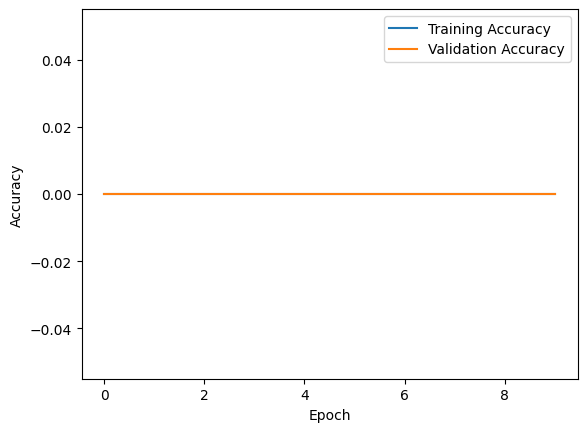

Test Loss (mean squared error): [0.625832200050354, 0.625832200050354, 0.0]


In [70]:
fit_evaluate_model(model1, 0.0001, MeanSquaredError(), ['mean_squared_error'], 10)

In [71]:
predict_from_model_regression(model1)

83/83 [==============================] - 0s 2ms/step
R-squared: 0.03407154007708535
Explained Variance: 0.03417086248133461


Epoch 1/10
155/155 [==============================] - 2s 4ms/step - loss: 8.2816 - mean_squared_error: 8.2816 - accuracy: 0.0000e+00 - val_loss: 0.7023 - val_mean_squared_error: 0.7023 - val_accuracy: 0.0000e+00
Epoch 2/10
155/155 [==============================] - 1s 3ms/step - loss: 1.3840 - mean_squared_error: 1.3840 - accuracy: 0.0000e+00 - val_loss: 0.8302 - val_mean_squared_error: 0.8302 - val_accuracy: 0.0000e+00
Epoch 3/10
155/155 [==============================] - 1s 3ms/step - loss: 1.1380 - mean_squared_error: 1.1380 - accuracy: 0.0000e+00 - val_loss: 1.3466 - val_mean_squared_error: 1.3466 - val_accuracy: 0.0000e+00
Epoch 4/10
155/155 [==============================] - 1s 3ms/step - loss: 1.0477 - mean_squared_error: 1.0477 - accuracy: 0.0000e+00 - val_loss: 1.0518 - val_mean_squared_error: 1.0518 - val_accuracy: 0.0000e+00
Epoch 5/10
155/155 [==============================] - 0s 3ms/step - loss: 0.9931 - mean_squared_error: 0.9931 - accuracy: 0.0000e+00 - val_loss: 1.4143 

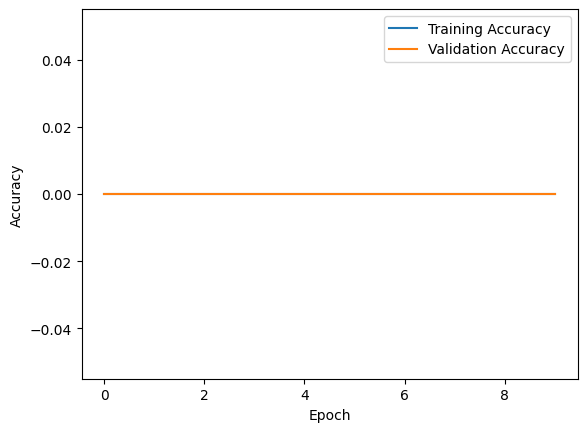

Test Loss (mean squared error): [0.7223867177963257, 0.7223867177963257, 0.0]


In [72]:
fit_evaluate_model(model2, 0.001, MeanSquaredError(), ['mean_squared_error'], 10)

In [73]:
predict_from_model_regression(model2)

83/83 [==============================] - 0s 2ms/step
R-squared: -0.11495344476510216
Explained Variance: 0.07976940588025316


#### 🔠 **Text features**

In [74]:
X_train, X_test, y_train, y_test = split_dataset(X_text_vectorized, y_regression)

Training set shape: (6181, 500) (6181,)
Testing set shape: (2649, 500) (2649,)


In [75]:
model1 = build_model1(X_text_vectorized.shape[1])
model2 = build_model2(X_text_vectorized.shape[1])

Epoch 1/10
155/155 [==============================] - 2s 7ms/step - loss: 23467.0547 - mean_squared_error: 23467.0547 - accuracy: 0.0000e+00 - val_loss: 4858.9707 - val_mean_squared_error: 4858.9707 - val_accuracy: 0.0000e+00
Epoch 2/10
155/155 [==============================] - 2s 10ms/step - loss: 3313.0925 - mean_squared_error: 3313.0925 - accuracy: 0.0000e+00 - val_loss: 1906.1348 - val_mean_squared_error: 1906.1348 - val_accuracy: 0.0000e+00
Epoch 3/10
155/155 [==============================] - 1s 8ms/step - loss: 1632.6887 - mean_squared_error: 1632.6887 - accuracy: 0.0000e+00 - val_loss: 1203.0353 - val_mean_squared_error: 1203.0353 - val_accuracy: 0.0000e+00
Epoch 4/10
155/155 [==============================] - 1s 7ms/step - loss: 1069.5007 - mean_squared_error: 1069.5007 - accuracy: 0.0000e+00 - val_loss: 870.3325 - val_mean_squared_error: 870.3325 - val_accuracy: 0.0000e+00
Epoch 5/10
155/155 [==============================] - 1s 8ms/step - loss: 759.9596 - mean_squared_error

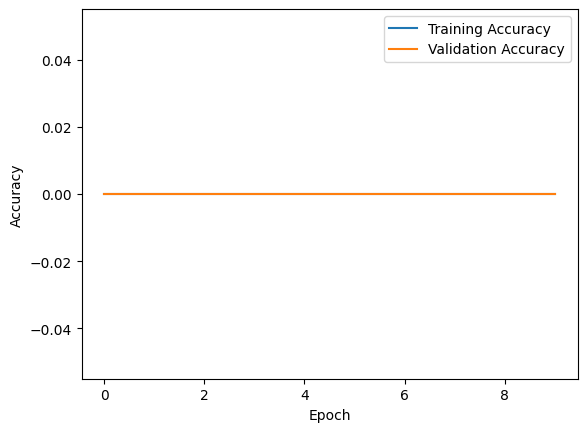

Test Loss (mean squared error): [262.31787109375, 262.31787109375, 0.0]


In [76]:
fit_evaluate_model(model1, 0.0001, MeanSquaredError(), ['mean_squared_error'], 10)

In [77]:
predict_from_model_regression(model1)

83/83 [==============================] - 0s 2ms/step
R-squared: -403.86942271288484
Explained Variance: -399.3624725722653


Epoch 1/10
155/155 [==============================] - 2s 5ms/step - loss: 11323.1484 - mean_squared_error: 11323.1484 - accuracy: 0.0000e+00 - val_loss: 343.9087 - val_mean_squared_error: 343.9087 - val_accuracy: 0.0000e+00
Epoch 2/10
155/155 [==============================] - 1s 4ms/step - loss: 904.5927 - mean_squared_error: 904.5927 - accuracy: 0.0000e+00 - val_loss: 165.0285 - val_mean_squared_error: 165.0285 - val_accuracy: 0.0000e+00
Epoch 3/10
155/155 [==============================] - 1s 5ms/step - loss: 514.2545 - mean_squared_error: 514.2545 - accuracy: 0.0000e+00 - val_loss: 76.4917 - val_mean_squared_error: 76.4917 - val_accuracy: 0.0000e+00
Epoch 4/10
155/155 [==============================] - 1s 5ms/step - loss: 325.6237 - mean_squared_error: 325.6237 - accuracy: 0.0000e+00 - val_loss: 52.1277 - val_mean_squared_error: 52.1277 - val_accuracy: 0.0000e+00
Epoch 5/10
155/155 [==============================] - 1s 5ms/step - loss: 226.7923 - mean_squared_error: 226.7923 - accu

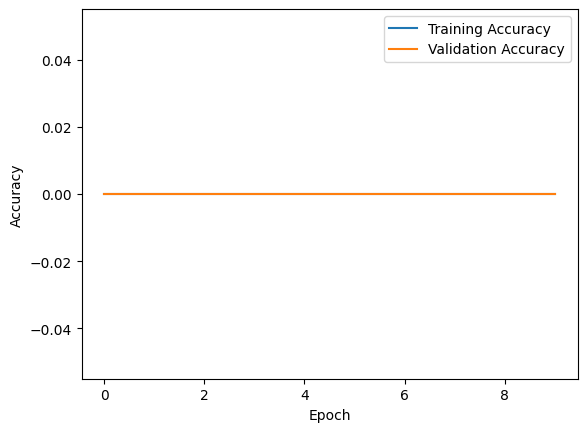

Test Loss (mean squared error): [20.28413963317871, 20.28413963317871, 0.0]


In [78]:
fit_evaluate_model(model2, 0.001, MeanSquaredError(), ['mean_squared_error'], 10)

In [79]:
predict_from_model_regression(model2)

83/83 [==============================] - 0s 2ms/step
R-squared: -30.307158624117204
Explained Variance: -14.881390716479256


### 📉 **Classification**
***target = popularity_class_label***

#### 🔢 **Numeric features**

In [170]:
y_classification_encoded = to_categorical(y_classification, num_classes=7)

In [171]:
X_train, X_test, y_train, y_test = split_dataset(X_numeric_classification_normalized, y_classification_encoded)

Training set shape: (6181, 5) (6181, 7)
Testing set shape: (2649, 5) (2649, 7)


In [172]:
max_len = max_len_overview
model1 = build_model1_classification(X_numeric_classification_normalized.shape[1])
model2 = build_model2(X_numeric_classification_normalized.shape[1])

Epoch 1/50
155/155 [==============================] - 2s 4ms/step - loss: 1.5874 - accuracy: 0.4258 - val_loss: 1.3165 - val_accuracy: 0.4543
Epoch 2/50
155/155 [==============================] - 1s 4ms/step - loss: 1.3428 - accuracy: 0.4288 - val_loss: 1.3027 - val_accuracy: 0.4406
Epoch 3/50
155/155 [==============================] - 1s 4ms/step - loss: 1.3281 - accuracy: 0.4373 - val_loss: 1.2897 - val_accuracy: 0.4406
Epoch 4/50
155/155 [==============================] - 0s 3ms/step - loss: 1.3205 - accuracy: 0.4361 - val_loss: 1.2868 - val_accuracy: 0.4406
Epoch 5/50
155/155 [==============================] - 0s 3ms/step - loss: 1.3218 - accuracy: 0.4389 - val_loss: 1.2825 - val_accuracy: 0.4406
Epoch 6/50
155/155 [==============================] - 0s 3ms/step - loss: 1.3201 - accuracy: 0.4381 - val_loss: 1.2838 - val_accuracy: 0.4406
Epoch 7/50
155/155 [==============================] - 1s 3ms/step - loss: 1.3196 - accuracy: 0.4375 - val_loss: 1.2912 - val_accuracy: 0.4406
Epoch 

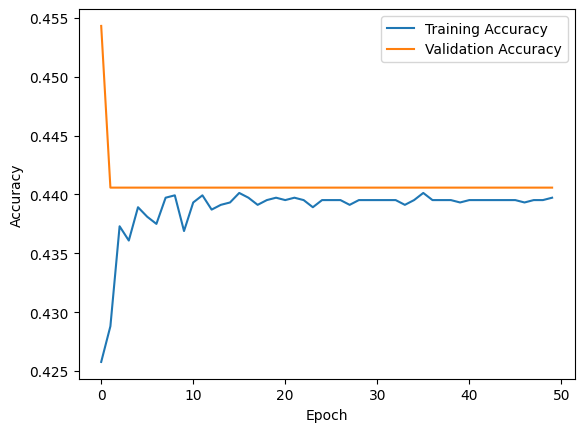

Test Loss (mean squared error): [1.3155431747436523, 0.4299735724925995]


In [83]:
fit_evaluate_model(model1, 0.003, 'categorical_crossentropy', ['accuracy'], 50)

83/83 [==============================] - 0s 2ms/step
Confusion Matrix:
 [[   0   12    0    0    0  919    0]
 [   0    0    0    0    0   26    0]
 [   0   31    0    0    0   62    0]
 [   0   77    0    0    0 1062    0]
 [   0    0    0    0    0  171    0]
 [   0    0    0    0    0    1    0]
 [   0   40    0    0    0  248    0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       931
           1       0.00      0.00      0.00        26
           2       1.00      0.00      0.00        93
           3       1.00      0.00      0.00      1139
           4       1.00      0.00      0.00       171
           5       0.00      1.00      0.00         1
           6       1.00      0.00      0.00       288

    accuracy                           0.00      2649
   macro avg       0.71      0.14      0.00      2649
weighted avg       0.99      0.00      0.00      2649

Accuracy: 0.00037750094375235937


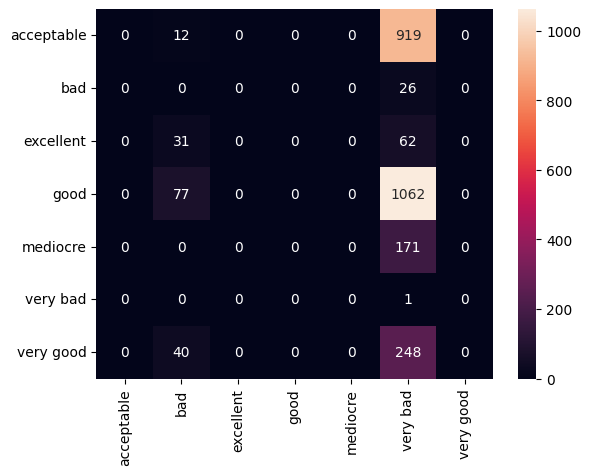

In [173]:
predict_from_model_classification(model1)

Epoch 1/20
155/155 [==============================] - 2s 5ms/step - loss: 1.3146 - accuracy: 0.4395 - val_loss: 1.2831 - val_accuracy: 0.4406
Epoch 2/20
155/155 [==============================] - 1s 4ms/step - loss: 1.3141 - accuracy: 0.4395 - val_loss: 1.2823 - val_accuracy: 0.4406
Epoch 3/20
155/155 [==============================] - 0s 3ms/step - loss: 1.3136 - accuracy: 0.4395 - val_loss: 1.2824 - val_accuracy: 0.4406
Epoch 4/20
155/155 [==============================] - 1s 4ms/step - loss: 1.3127 - accuracy: 0.4395 - val_loss: 1.2816 - val_accuracy: 0.4406
Epoch 5/20
155/155 [==============================] - 0s 3ms/step - loss: 1.3129 - accuracy: 0.4395 - val_loss: 1.2814 - val_accuracy: 0.4406
Epoch 6/20
155/155 [==============================] - 1s 3ms/step - loss: 1.3135 - accuracy: 0.4395 - val_loss: 1.2833 - val_accuracy: 0.4406
Epoch 7/20
155/155 [==============================] - 1s 3ms/step - loss: 1.3138 - accuracy: 0.4395 - val_loss: 1.2834 - val_accuracy: 0.4406
Epoch 

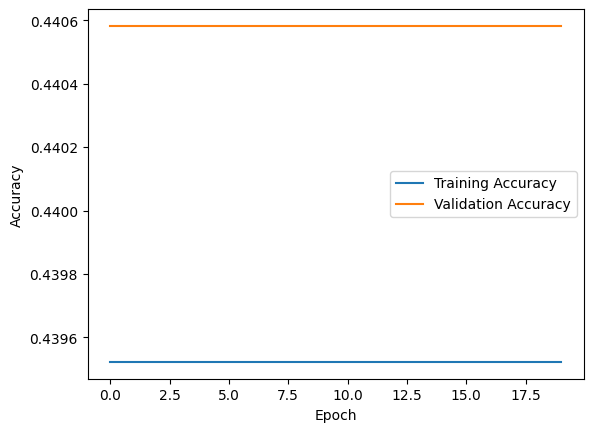

Test Loss (mean squared error): [1.3156248331069946, 0.4299735724925995]


In [85]:
fit_evaluate_model(model1, 0.001, 'categorical_crossentropy', ['accuracy'], 20)

83/83 [==============================] - 0s 2ms/step
Confusion Matrix:
 [[ 931    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]
 [  93    0    0    0    0    0    0]
 [1139    0    0    0    0    0    0]
 [ 171    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0]
 [ 288    0    0    0    0    0    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.35      1.00      0.52       931
           1       1.00      0.00      0.00        26
           2       1.00      0.00      0.00        93
           3       1.00      0.00      0.00      1139
           4       1.00      0.00      0.00       171
           5       1.00      0.00      0.00         1
           6       1.00      0.00      0.00       288

    accuracy                           0.35      2649
   macro avg       0.91      0.14      0.07      2649
weighted avg       0.77      0.35      0.18      2649

Accuracy: 0.35145337863344656


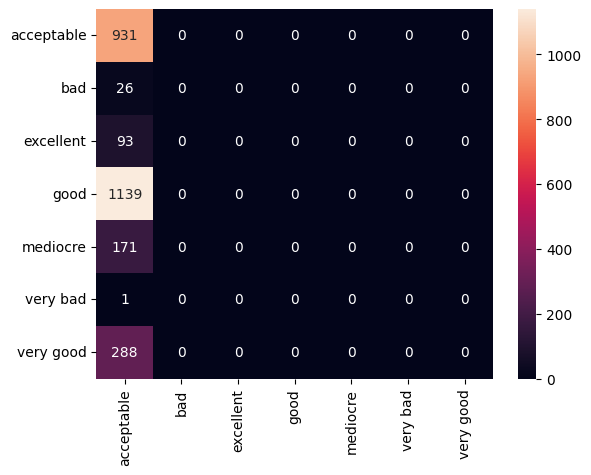

In [174]:
predict_from_model_classification(model2)

#### 🔠 **Overview: Text features**

In [151]:
y_classification_encoded = to_categorical(y_classification, num_classes=7)

In [152]:
X_train, X_test, y_train, y_test = split_dataset(X_text_vectorized, y_classification_encoded)

Training set shape: (6181, 500) (6181, 7)
Testing set shape: (2649, 500) (2649, 7)


In [153]:
max_len = max_len_overview
model_embedding = build_model_embedding()

In [154]:
model_embedding.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 64)           640000    
                                                                 
 flatten_5 (Flatten)         (None, 32000)             0         
                                                                 
 dense_64 (Dense)            (None, 128)               4096128   
                                                                 
 dense_65 (Dense)            (None, 64)                8256      
                                                                 
 dense_66 (Dense)            (None, 7)                 455       
                                                                 
Total params: 4744839 (18.10 MB)
Trainable params: 4744839 (18.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
155/155 [==============================] - 14s 81ms/step - loss: 1.7097 - accuracy: 0.4047 - val_loss: 1.4141 - val_accuracy: 0.4406
Epoch 2/10
155/155 [==============================] - 13s 82ms/step - loss: 1.1895 - accuracy: 0.5649 - val_loss: 1.5357 - val_accuracy: 0.3751
Epoch 3/10
155/155 [==============================] - 12s 80ms/step - loss: 0.5694 - accuracy: 0.8087 - val_loss: 1.9784 - val_accuracy: 0.3848
Epoch 4/10
155/155 [==============================] - 12s 80ms/step - loss: 0.2579 - accuracy: 0.9181 - val_loss: 2.4872 - val_accuracy: 0.3581
Epoch 5/10
155/155 [==============================] - 12s 75ms/step - loss: 0.1486 - accuracy: 0.9640 - val_loss: 2.4710 - val_accuracy: 0.3848
Epoch 6/10
155/155 [==============================] - 12s 75ms/step - loss: 0.0764 - accuracy: 0.9846 - val_loss: 2.4606 - val_accuracy: 0.3533
Epoch 7/10
155/155 [==============================] - 13s 82ms/step - loss: 0.0406 - accuracy: 0.9933 - val_loss: 2.6129 - val_accuracy:

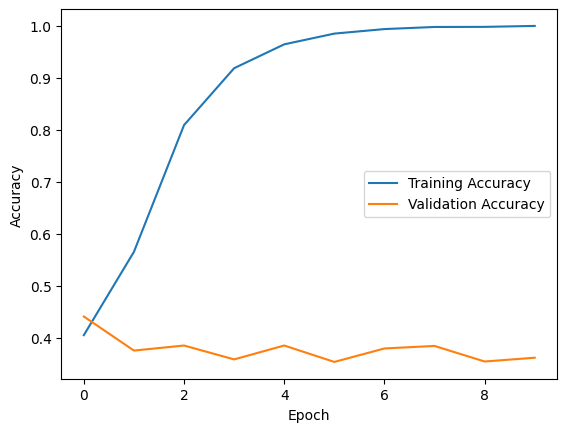

Test Loss (mean squared error): [2.697305917739868, 0.35749340057373047]


In [155]:
fit_evaluate_model(model_embedding, 0.01, 'categorical_crossentropy', ['accuracy'], 10)

83/83 [==============================] - 1s 17ms/step
Confusion Matrix:
 [[420   5   4 338 109   0  55]
 [ 13   0   0   7   4   0   2]
 [ 32   1   2  45   8   0   5]
 [463   7   9 478 107   0  75]
 [ 66   1   0  68  25   0  11]
 [  0   0   0   0   0   0   1]
 [126   0   1 109  30   0  22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.45      0.41       931
           1       0.00      0.00      0.00        26
           2       0.12      0.02      0.04        93
           3       0.46      0.42      0.44      1139
           4       0.09      0.15      0.11       171
           5       1.00      0.00      0.00         1
           6       0.13      0.08      0.10       288

    accuracy                           0.36      2649
   macro avg       0.31      0.16      0.16      2649
weighted avg       0.35      0.36      0.35      2649

Accuracy: 0.3574933937334843


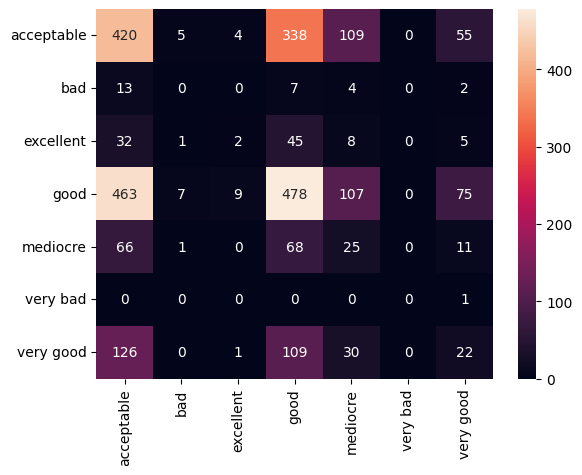

In [158]:
predict_from_model_classification(model_embedding)

In [92]:
max_len = max_len_overview
model_embedding_2 = build_model_embedding_2()

In [108]:
model_embedding_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1  (None, 98, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_38 (Dense)            (None, 7)                

Epoch 1/20
155/155 [==============================] - 23s 145ms/step - loss: 1.9371 - accuracy: 0.0862 - val_loss: 1.9204 - val_accuracy: 0.3961
Epoch 2/20
155/155 [==============================] - 19s 125ms/step - loss: 1.9039 - accuracy: 0.4320 - val_loss: 1.8831 - val_accuracy: 0.4406
Epoch 3/20
155/155 [==============================] - 19s 125ms/step - loss: 1.8585 - accuracy: 0.4395 - val_loss: 1.8278 - val_accuracy: 0.4406
Epoch 4/20
155/155 [==============================] - 21s 137ms/step - loss: 1.7915 - accuracy: 0.4395 - val_loss: 1.7459 - val_accuracy: 0.4406
Epoch 5/20
155/155 [==============================] - 19s 124ms/step - loss: 1.7056 - accuracy: 0.4395 - val_loss: 1.6532 - val_accuracy: 0.4406
Epoch 6/20
155/155 [==============================] - 20s 127ms/step - loss: 1.6177 - accuracy: 0.4395 - val_loss: 1.5653 - val_accuracy: 0.4406
Epoch 7/20
155/155 [==============================] - 22s 141ms/step - loss: 1.5398 - accuracy: 0.4395 - val_loss: 1.4903 - val_ac

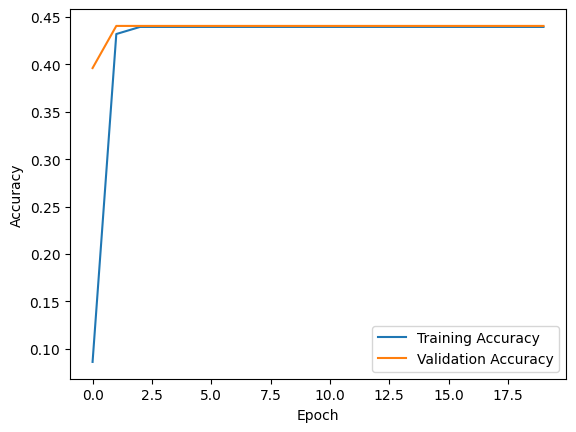

Test Loss (mean squared error): [1.3348604440689087, 0.4299735724925995]


In [93]:
fit_evaluate_model(model_embedding_2, 10E-6, 'categorical_crossentropy', ['accuracy'], 20)

83/83 [==============================] - 3s 40ms/step
Confusion Matrix:
 [[   0    0    0  931    0    0    0]
 [   0    0    0   26    0    0    0]
 [   0    0    0   93    0    0    0]
 [   0    0    0 1139    0    0    0]
 [   0    0    0  171    0    0    0]
 [   0    0    0    1    0    0    0]
 [   0    0    0  288    0    0    0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       931
           1       1.00      0.00      0.00        26
           2       1.00      0.00      0.00        93
           3       0.43      1.00      0.60      1139
           4       1.00      0.00      0.00       171
           5       1.00      0.00      0.00         1
           6       1.00      0.00      0.00       288

    accuracy                           0.43      2649
   macro avg       0.92      0.14      0.09      2649
weighted avg       0.75      0.43      0.26      2649

Accuracy: 0.42997357493393734


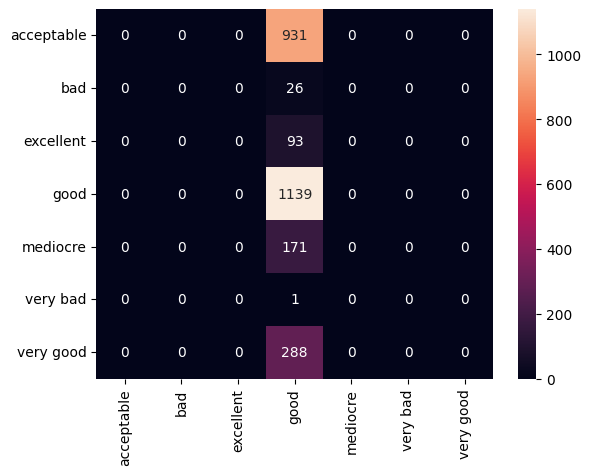

In [159]:
predict_from_model_classification(model_embedding_2)

In [95]:
max_len = max_len_overview
model_embedding_3 = build_model_embedding_3()

In [96]:
max_len = max_len_overview
model_embedding_4 = build_model_embedding_4()

In [109]:
model_embedding_4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 64)           640000    
                                                                 
 flatten_2 (Flatten)         (None, 32000)             0         
                                                                 
 dense_40 (Dense)            (None, 32)                1024032   
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_41 (Dense)            (None, 32)                1056      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_42 (Dense)            (None, 32)              

Epoch 1/10
155/155 [==============================] - 5s 26ms/step - loss: 1.4123 - accuracy: 0.4246 - val_loss: 1.2881 - val_accuracy: 0.4406
Epoch 2/10
155/155 [==============================] - 4s 28ms/step - loss: 1.3195 - accuracy: 0.4387 - val_loss: 1.2848 - val_accuracy: 0.4406
Epoch 3/10
155/155 [==============================] - 5s 31ms/step - loss: 1.3156 - accuracy: 0.4397 - val_loss: 1.2879 - val_accuracy: 0.4406
Epoch 4/10
155/155 [==============================] - 4s 25ms/step - loss: 1.3157 - accuracy: 0.4361 - val_loss: 1.2831 - val_accuracy: 0.4406
Epoch 5/10
155/155 [==============================] - 4s 26ms/step - loss: 1.3161 - accuracy: 0.4302 - val_loss: 1.2853 - val_accuracy: 0.4406
Epoch 6/10
155/155 [==============================] - 5s 34ms/step - loss: 1.3167 - accuracy: 0.4345 - val_loss: 1.2855 - val_accuracy: 0.4406
Epoch 7/10
155/155 [==============================] - 4s 26ms/step - loss: 1.3177 - accuracy: 0.4395 - val_loss: 1.2855 - val_accuracy: 0.4406

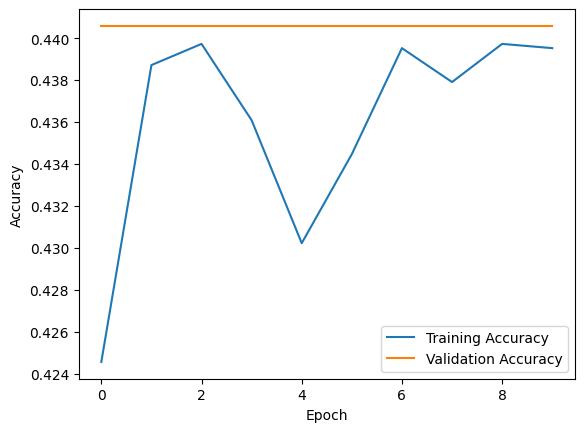

Test Loss (mean squared error): [1.31843101978302, 0.4299735724925995]


In [97]:
fit_evaluate_model(model_embedding_4, 0.01, 'categorical_crossentropy', ['accuracy'], 10)

83/83 [==============================] - 1s 8ms/step
Confusion Matrix:
 [[   0    0    0  931    0    0    0]
 [   0    0    0   26    0    0    0]
 [   0    0    0   93    0    0    0]
 [   0    0    0 1139    0    0    0]
 [   0    0    0  171    0    0    0]
 [   0    0    0    1    0    0    0]
 [   0    0    0  288    0    0    0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       931
           1       1.00      0.00      0.00        26
           2       1.00      0.00      0.00        93
           3       0.43      1.00      0.60      1139
           4       1.00      0.00      0.00       171
           5       1.00      0.00      0.00         1
           6       1.00      0.00      0.00       288

    accuracy                           0.43      2649
   macro avg       0.92      0.14      0.09      2649
weighted avg       0.75      0.43      0.26      2649

Accuracy: 0.42997357493393734


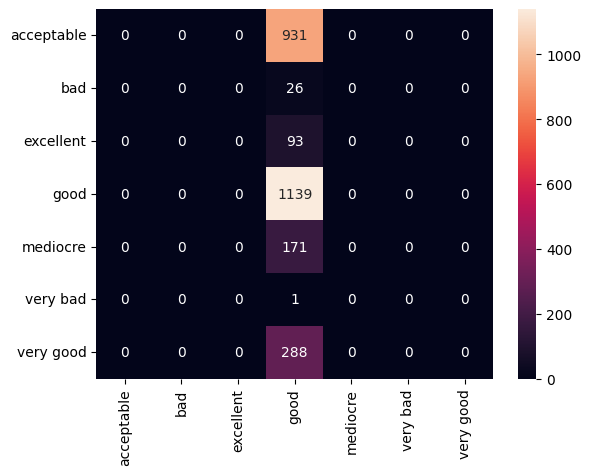

In [160]:
predict_from_model_classification(model_embedding_4)

In [99]:
model_lstm = build_lstm_model()

In [110]:
model_lstm.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 spatial_dropout1d (Spatial  (None, 500, 128)          0         
 Dropout1D)                                                      
                                                                 
 lstm_1 (LSTM)               (None, 50)                35800     
                                                                 
 dense_44 (Dense)            (None, 7)                 357       
                                                                 
Total params: 1316157 (5.02 MB)
Trainable params: 1316157 (5.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
155/155 [==============================] - 164s 1s/step - loss: 1.3446 - accuracy: 0.4246 - val_loss: 1.2968 - val_accuracy: 0.4422
Epoch 2/10
155/155 [==============================] - 148s 955ms/step - loss: 1.1060 - accuracy: 0.5696 - val_loss: 1.4222 - val_accuracy: 0.4196
Epoch 3/10
155/155 [==============================] - 147s 950ms/step - loss: 0.5871 - accuracy: 0.7989 - val_loss: 1.9446 - val_accuracy: 0.3977
Epoch 4/10
155/155 [==============================] - 155s 1s/step - loss: 0.2718 - accuracy: 0.9098 - val_loss: 2.5612 - val_accuracy: 0.3864
Epoch 5/10
155/155 [==============================] - 149s 959ms/step - loss: 0.1259 - accuracy: 0.9602 - val_loss: 3.2181 - val_accuracy: 0.3743
Epoch 6/10
155/155 [==============================] - 152s 978ms/step - loss: 0.0748 - accuracy: 0.9763 - val_loss: 3.5736 - val_accuracy: 0.3840
Epoch 7/10
155/155 [==============================] - 146s 942ms/step - loss: 0.0453 - accuracy: 0.9850 - val_loss: 3.9687 - val_a

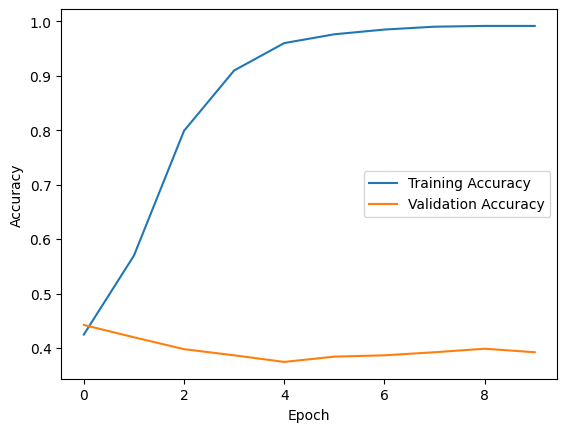

Test Loss (mean squared error): [5.019917011260986, 0.36202341318130493]


In [100]:
fit_evaluate_model(model_lstm, 0.01, 'categorical_crossentropy', ['accuracy'], 10)

83/83 [==============================] - 16s 197ms/step
Confusion Matrix:
 [[296   3  24 449 104   0  55]
 [ 13   1   0   8   3   0   1]
 [ 20   0   3  54   9   0   7]
 [344   2  27 619  73   0  74]
 [ 66   3   1  73  18   0  10]
 [  0   0   0   1   0   0   0]
 [ 81   1  11 154  19   0  22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.32      0.34       931
           1       0.10      0.04      0.06        26
           2       0.05      0.03      0.04        93
           3       0.46      0.54      0.50      1139
           4       0.08      0.11      0.09       171
           5       1.00      0.00      0.00         1
           6       0.13      0.08      0.10       288

    accuracy                           0.36      2649
   macro avg       0.31      0.16      0.16      2649
weighted avg       0.35      0.36      0.35      2649

Accuracy: 0.36202340505851266


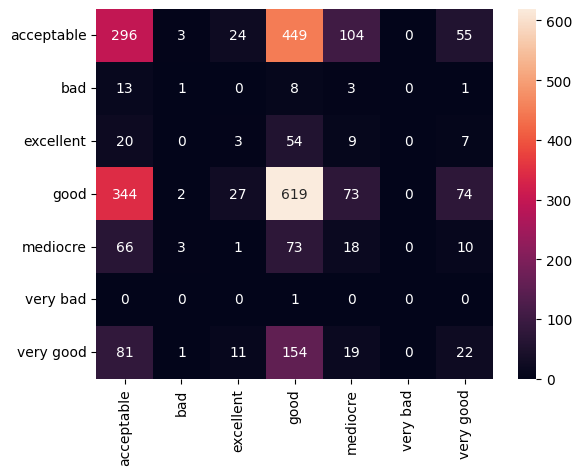

In [161]:
predict_from_model_classification(model_lstm)

#### 🔠 **Title: Text features**

In [165]:
y_classification_encoded = to_categorical(y_classification, num_classes=7)

In [166]:
X_train, X_test, y_train, y_test = split_dataset(X_text_vectorized_title, y_classification_encoded)

Training set shape: (6181, 90) (6181, 7)
Testing set shape: (2649, 90) (2649, 7)


In [167]:
max_len = max_len_title
model_embedding = build_model_embedding()

In [168]:
model_embedding.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 90, 64)            640000    
                                                                 
 flatten_6 (Flatten)         (None, 5760)              0         
                                                                 
 dense_67 (Dense)            (None, 128)               737408    
                                                                 
 dense_68 (Dense)            (None, 64)                8256      
                                                                 
 dense_69 (Dense)            (None, 7)                 455       
                                                                 
Total params: 1386119 (5.29 MB)
Trainable params: 1386119 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
155/155 [==============================] - 4s 20ms/step - loss: 1.4469 - accuracy: 0.4217 - val_loss: 1.2918 - val_accuracy: 0.4406
Epoch 2/10
155/155 [==============================] - 3s 19ms/step - loss: 1.1061 - accuracy: 0.5722 - val_loss: 1.4631 - val_accuracy: 0.4058
Epoch 3/10
155/155 [==============================] - 3s 19ms/step - loss: 0.6215 - accuracy: 0.7921 - val_loss: 1.8908 - val_accuracy: 0.3452
Epoch 4/10
155/155 [==============================] - 6s 37ms/step - loss: 0.4140 - accuracy: 0.8643 - val_loss: 2.0036 - val_accuracy: 0.3088
Epoch 5/10
155/155 [==============================] - 4s 23ms/step - loss: 0.3082 - accuracy: 0.8987 - val_loss: 2.3933 - val_accuracy: 0.3670
Epoch 6/10
155/155 [==============================] - 3s 19ms/step - loss: 0.2221 - accuracy: 0.9213 - val_loss: 2.4901 - val_accuracy: 0.3678
Epoch 7/10
155/155 [==============================] - 5s 34ms/step - loss: 0.1929 - accuracy: 0.9345 - val_loss: 2.7963 - val_accuracy: 0.3452

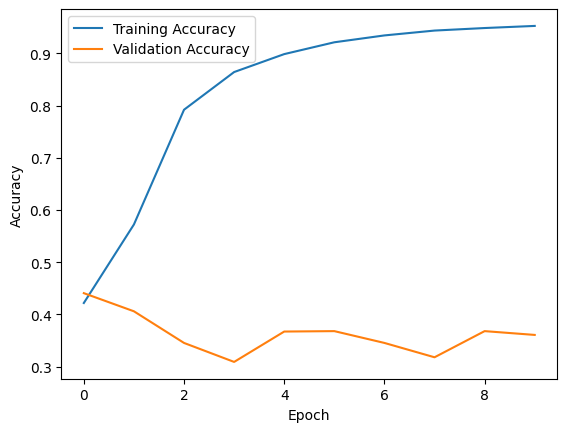

Test Loss (mean squared error): [3.258723020553589, 0.3722159266471863]


In [105]:
fit_evaluate_model(model_embedding, 0.01, 'categorical_crossentropy', ['accuracy'], 10)

83/83 [==============================] - 0s 3ms/step
Confusion Matrix:
 [[   0    0   83    0  848    0    0]
 [   0    0    1    0   25    0    0]
 [   0    0   16    0   76    0    1]
 [   0    0  123    0 1015    0    1]
 [   0    0   19    0  152    0    0]
 [   0    0    0    0    1    0    0]
 [   0    0   28    0  260    0    0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       931
           1       1.00      0.00      0.00        26
           2       0.06      0.17      0.09        93
           3       1.00      0.00      0.00      1139
           4       0.06      0.89      0.12       171
           5       1.00      0.00      0.00         1
           6       0.00      0.00      0.00       288

    accuracy                           0.06      2649
   macro avg       0.59      0.15      0.03      2649
weighted avg       0.80      0.06      0.01      2649

Accuracy: 0.06342015855039637


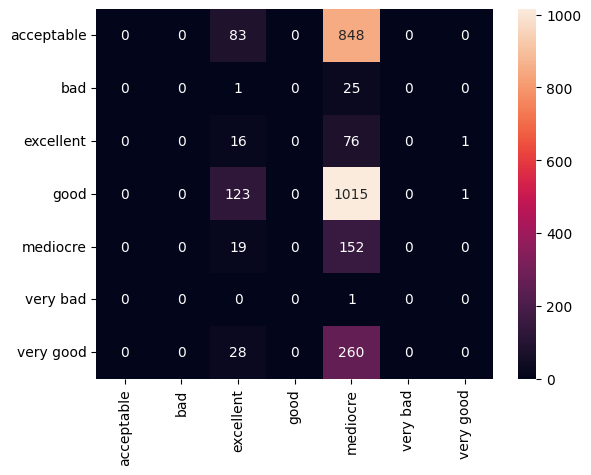

In [169]:
predict_from_model_classification(model_embedding)